In [70]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity 
import numpy as np
from astropy.io.votable import parse
import time
import os
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import matplotlib.ticker as ticker


# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
params = {

    # Figure and axes title/label sizes
    "figure.titlesize": 20,
    "axes.titlesize": 20,
    "axes.labelsize": 18,
    
    # Major Tick settings
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    
    "xtick.major.size": 10.0,
    "ytick.major.size": 10.0,
    
    "xtick.direction": "out",         # Major tick direction: inside
    "ytick.direction": "out",         # Major tick direction: inside
    "xtick.top": True,               # Major ticks on top
    "xtick.bottom": True,
    "ytick.left": True,
    "ytick.right": True,             # Major ticks on right
    "xtick.labeltop": False,          # Tick labels on top
    "xtick.labelbottom": True,
    "ytick.labelleft": True,
    "ytick.labelright": False,        # Tick labels on right

    # Minor Tick settings
    "xtick.minor.visible": True,     # Display minor ticks
    "ytick.minor.visible": True,     # Display minor ticks
    "xtick.minor.size": 3.0,         # Size of minor ticks
    "ytick.minor.size": 3.0,         # Size of minor ticks

    # Axes settings
    "axes.linewidth": 1.5,           # Thickness of the axes

    # Legend settings
    "legend.fontsize": 12,
    "legend.frameon": True,          # Display legend frame
    
    # Adjusted tick_params
    "xtick.major.pad": 8,
    "ytick.major.pad": 8,
}


plt.rcParams.update(params)

plt.rcParams.update({"font.size": 25})

You can get Gaia data two ways

# 1. Direct download form Gaia Archive

Write this query at: [Gaia Archive](https://gea.esac.esa.int/archive/)

ADQL Query:

```sql
SELECT TOP 300000
source_id,ra,ra_error,dec,dec_error,l,b,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error, teff_val
FROM gaiadr2.gaia_source
WHERE (parallax>0 AND parallax<20) ORDER BY parallax DESC
```
Data will be downloaded in xxxxxxxx-result.vot format.



In [57]:
# ----------------------------------
# Reading xxxxxxxx-result.vot data file

dir = "data/1708103343552O-result.vot"
start_time = time.time()

data_vot = parse(dir)
# ----------------------------------
end_time = time.time()
print(f"It took {end_time-start_time} seconds to run.")

It took 6.447323799133301 seconds to run.


In [58]:
file_size = os.path.getsize(dir)/(1024 * 1024)
print(f"The size of the file '{dir}' is {file_size:.2f} MBs.")

The size of the file 'data/1708103343552O-result.vot' is 39.52 MBs.


In [59]:
# Printing the data

#Getting the data and converting the table into array
tables_vot = data_vot.get_first_table().array

# Printing the columns names. This would return the entires we asked in query
tables_vot.dtype.names


('source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'l',
 'b',
 'parallax',
 'parallax_error',
 'phot_g_mean_mag',
 'bp_rp',
 'radial_velocity',
 'radial_velocity_error',
 'teff_val')

In [60]:
# Converting the vot table into Pandas table 

dat = pd.DataFrame(tables_vot.data)
dat

,source_id,ra,ra_error,dec,dec_error,l,b,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val
0,4117288282921966080,266.044631,0.893471,-21.660928,1.073484,6.044513,4.069457,19.999985,1.797824,19.287512,NaN,NaN,NaN,NaN
1,582061492736862208,133.479435,1.777968,5.575689,1.062756,222.519934,29.700516,19.999981,1.746292,20.542543,1.289989,NaN,NaN,NaN
2,2873046565103607296,353.652473,0.024201,34.040216,0.014760,105.247660,-26.179493,19.999869,0.034902,8.866842,0.964261,-24.948452,0.156995,5319.250000
3,5856368988218578816,186.612876,1.165985,-69.355339,1.338027,300.718734,-6.591030,19.999771,1.556588,20.401766,1.508101,NaN,NaN,NaN
4,3501215730056271104,188.596816,0.739843,-23.397004,0.733411,297.873969,39.307235,19.999759,0.921684,2.251339,5.089401,NaN,NaN,4732.666504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,4311285667808118144,283.048678,1.740934,9.468267,0.977772,41.458919,4.135252,12.138509,2.405576,20.513885,1.413488,NaN,NaN,NaN
299996,5693998054531315200,121.850900,0.736765,-27.466218,0.998401,245.802267,2.674887,12.138507,1.329162,19.321455,1.411810,NaN,NaN,NaN
299997,1838628568313466624,313.631587,0.030722,21.319554,0.032419,66.981871,-14.975027,12.138505,0.042336,9.500201,0.861245,-26.865568,0.587959,5615.000000
299998,5870215172528179968,202.734098,0.481766,-58.976503,0.662401,308.012183,3.505090,12.138489,1.190318,20.135609,1.745832,NaN,NaN,NaN


# 2. Downloading the same data directly using astroquery

- Install astroquery using: `pip3 install astroquery`
- Import from `astroquery.gaia` import Gaia


In [51]:
from astroquery.gaia import Gaia

In [52]:
# SSL Certificate Verification
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [53]:
# 'only_names=True' will only table names metadata. To get all tables metadata, leave it empty
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [54]:
# Prints the qualified names of all available tables in the 'GaiaDR2' dataset.
# Replace "GaiaDR2" with "GaiaDR1" or "GaiaDR3" to retrieve data from those datasets.
for table in tables:
    if "gaiadr2" in table.get_qualified_name():
        print(table.get_qualified_name())


external.external.gaiadr2_astrophysical_parameters
external.external.gaiadr2_geometric_distance
gaiadr2.gaiadr2.aux_allwise_agn_gdr2_cross_id
gaiadr2.gaiadr2.aux_iers_gdr2_cross_id
gaiadr2.gaiadr2.aux_sso_orbit_residuals
gaiadr2.gaiadr2.aux_sso_orbits
gaiadr2.gaiadr2.dr1_neighbourhood
gaiadr2.gaiadr2.allwise_best_neighbour
gaiadr2.gaiadr2.allwise_neighbourhood
gaiadr2.gaiadr2.apassdr9_best_neighbour
gaiadr2.gaiadr2.apassdr9_neighbourhood
gaiadr2.gaiadr2.gsc23_best_neighbour
gaiadr2.gaiadr2.gsc23_neighbourhood
gaiadr2.gaiadr2.hipparcos2_best_neighbour
gaiadr2.gaiadr2.hipparcos2_neighbourhood
gaiadr2.gaiadr2.panstarrs1_best_neighbour
gaiadr2.gaiadr2.panstarrs1_neighbourhood
gaiadr2.gaiadr2.ppmxl_best_neighbour
gaiadr2.gaiadr2.ppmxl_neighbourhood
gaiadr2.gaiadr2.ravedr5_best_neighbour
gaiadr2.gaiadr2.ravedr5_neighbourhood
gaiadr2.gaiadr2.sdssdr9_best_neighbour
gaiadr2.gaiadr2.sdssdr9_neighbourhood
gaiadr2.gaiadr2.tmass_best_neighbour
gaiadr2.gaiadr2.tmass_neighbourhood
gaiadr2.gaiadr2.tyc

In [56]:
# Launching a Gaia job to retrieve data with the specified criteria.
# --------------------------------------------------------------
# Setting dump_to_file=True will save the data in a xxxxxxxx-result.vot file in the current directory. Set to False if the file is not desired.

job = Gaia.launch_job_async("SELECT TOP 300000 \
                            source_id,ra,ra_error,dec,dec_error,l,b,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error, teff_val \
                            FROM gaiadr2.gaia_source \
                            WHERE (parallax>0 AND parallax<20) ORDER BY parallax DESC;" \
, dump_to_file=False)
# --------------------------------------------------------------
# Calculating the total time taken to execute the query.
end_time = time.time()
print(f"It took {end_time - start_time:.2f} seconds to run.")


It took 125.12 seconds to run.


In [11]:
# Get the data in tablular form
data_aq = job.get_results()
data_aq

source_id,ra,ra_error,dec,dec_error,l,b,parallax,parallax_error,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error
,deg,mas,deg,mas,deg,deg,mas,mas,mag,mag,km / s,km / s
int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64
4117288282921966080,266.04463092701246,0.8934713190795064,-21.660928051434297,1.073484100785791,6.044512574546379,4.069457307536806,19.999984522826598,1.797824000236265,19.287512,--,--,--
582061492736862208,133.47943452648659,1.777967889552957,5.575688660529979,1.0627563600213814,222.51993430409095,29.700516214275297,19.99998065278635,1.746292367203811,20.542543,1.2899895,--,--
2873046565103607296,353.6524728565999,0.024201071909174185,34.040216168121546,0.014759947138615228,105.24765995925236,-26.17949324118115,19.999868942004625,0.03490192882907318,8.866842,0.96426105,-24.948452404382216,0.1569946619805067
5856368988218578816,186.6128758915009,1.1659845797238693,-69.35533872988597,1.3380274741633431,300.71873355208646,-6.5910295282435865,19.999770899564904,1.5565883630225643,20.401766,1.5081005,--,--
3501215730056271104,188.59681642029955,0.739843122818553,-23.39700371398805,0.7334105590694951,297.87396944587454,39.307235007733176,19.999758759348637,0.9216841072237661,2.2513392,5.0894012,--,--
3812489365960784000,172.84115687403914,0.04273824575281059,3.6650354145636705,0.030424591419755766,260.2671348394262,59.72954808226708,19.999647342521353,0.050853290634791506,14.175144,2.514309,--,--
6621832284637642240,335.35010487009134,0.09442999862392232,-26.848188848269228,0.07673034262259244,24.634978529861893,-56.70137701874159,19.999544038633793,0.11130726434587608,14.825993,-0.042341232,--,--
5184695339307290112,43.883525372390494,0.033797613030967046,-4.011168104543332,0.039896831537146016,180.43169479371775,-52.438975310080956,19.9995401945411,0.045682400181712754,10.996955,1.6924343,18.885873489282055,0.3680410052732983


In [12]:
# Checking if values in both tables are the same.
for col in dat.columns:
    if col in data_aq.columns:
        are_equal = (dat[col] == data_aq[col]).all()
        print(f"{col}: {are_equal}")
    else:
        print(f"Column '{col}' not found in data_aq")


source_id: True
ra: True
ra_error: True
dec: True
dec_error: True
l: True
b: True
parallax: True
parallax_error: True
phot_g_mean_mag: True
bp_rp: True
radial_velocity: True
radial_velocity_error: True


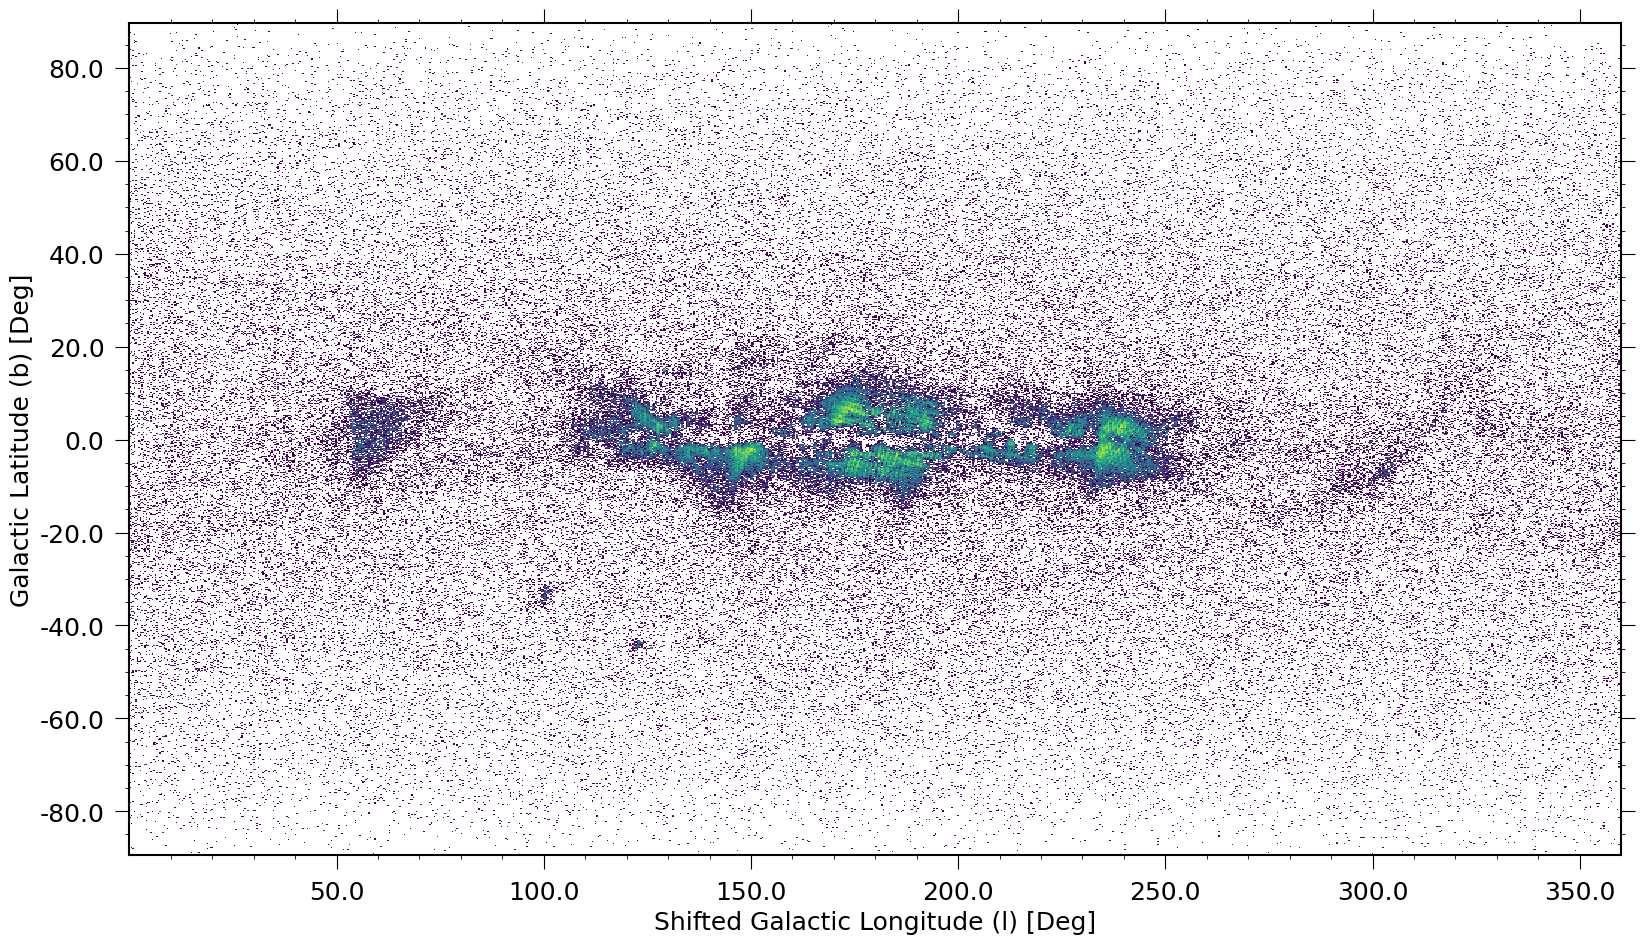

In [14]:
fig, ax =plt.subplots(figsize = (17, 10))

# Create the 2D histogram
hist = ax.hist2d((dat["l"] + 180) % 360, dat["b"], bins=1000, norm=LogNorm())

# Set labels and title
ax.set_xlabel('Shifted Galactic Longitude (l) [Deg]')
ax.set_ylabel('Galactic Latitude (b) [Deg]')

# Set scientific notation for ticks
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))

fig.tight_layout()

- Let's plot HR diagram (Absolute Magnitude (G) vs. color)



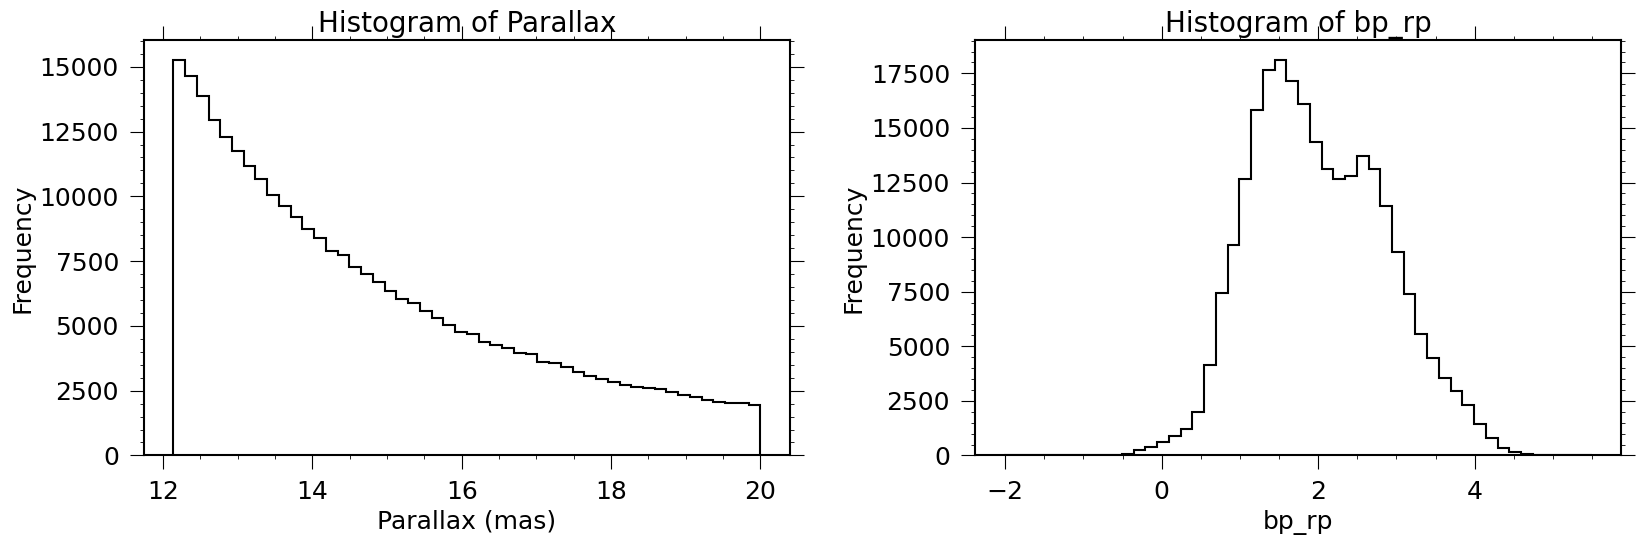

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(17, 6))

# Histogram for parallax
ax[0].hist(dat["parallax"], bins=50, histtype='step', color='black', linewidth=1.5)
ax[0].set_xlabel('Parallax (mas)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Parallax')

# Histogram for bp_rp
ax[1].hist(dat["bp_rp"], bins=50, histtype='step', color='black', linewidth=1.5)
ax[1].set_xlabel('bp_rp')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of bp_rp')

fig.tight_layout()
plt.show()


In [62]:

def apparent_to_absolute_magnitude(apparent_magnitude, parallax_mas):
    # Calculate distance in parsecs from parallax in mas
    distance_pc = 1 / (parallax_mas / 1000)
    
    # Calculate absolute magnitude using NumPy
    absolute_magnitude = apparent_magnitude - 5 * (np.log10(distance_pc) - 1)
    
    return absolute_magnitude


In [63]:
# Making sure we don't select and phot_g_mean_mag, NaN bp_rp and parallax
data_hr =dat[dat['phot_g_mean_mag'].notna() & dat['bp_rp'].notna() &  dat['parallax'].notna()]
abs_mag = apparent_to_absolute_magnitude(data_hr["phot_g_mean_mag"], data_hr["parallax"])


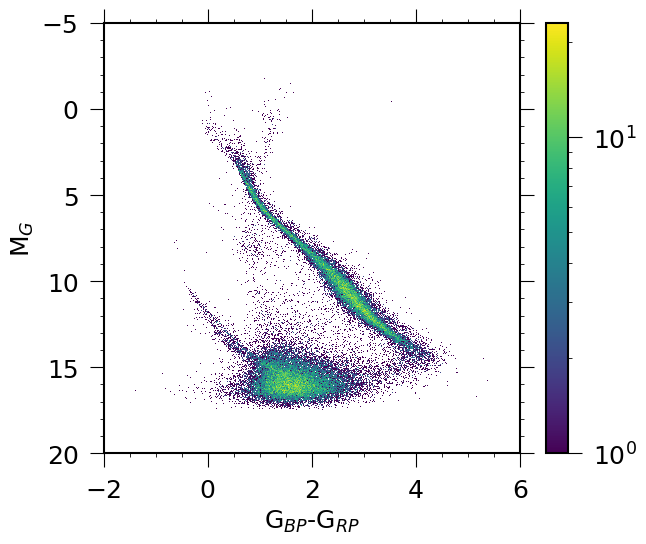

In [64]:
fig, ax = plt.subplots(figsize=(7, 6))

# Create the 2D histogram with a specified colormap (here, using the 'viridis' colormap)
h = ax.hist2d(data_hr["bp_rp"], abs_mag, bins=1000, range=((-2, 6), (-5, 20)), norm=colors.LogNorm(), cmap='viridis')

ax.invert_yaxis()
ax.set_xlabel('G$_{BP}$-G$_{RP}$')
ax.set_ylabel('M$_G$')

# Add a colorbar to the plot
cbar = plt.colorbar(h[3], ax=ax)

# Adjust the colorbar ticks

fig.tight_layout()
plt.show()
